# Perfect model: Random forest classifier (1)
## part 1: Determining the depth of trees by visualization using visualization

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/kaggletrain.csv')
df = df.dropna(how='any')
print(df.columns)
print(df.shape)
df.dtypes


Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(183, 13)


Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
del df['Unnamed: 0']
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Digitizing data in page format

In [5]:
df['Sex'] = pd.Categorical(df.Sex).codes
df['Ticket'] = pd.Categorical(df.Ticket).codes
df['Cabin'] = pd.Categorical(df.Ticket).codes
df['Embarked'] = pd.Categorical(df.Embarked).codes

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Cabin            int16
Embarked          int8
dtype: object

In [6]:
df['Sex']=df['Sex'].astype('int64')
df['Age']=df['Age'].astype('int64')
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Cabin            int16
Embarked          int8
dtype: object

### Selection of variables divided into test and training set

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split  

df2 = df[['Sex','Age','Pclass','Survived']]
X = df2[['Sex','Age']]
y = df2['Survived']

print('X :',X.shape)
print('y :',y.shape)
#Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 0)

X : (183, 2)
y : (183,)


#### Replacing dataframe with array

In [8]:
import numpy as np

y = np.asarray(y)
X = np.asarray(X)

In [9]:
print('X:',X.shape)
print('y:',y.shape)

X: (183, 2)
y: (183,)


### Data normalization (standardization)

### How Random Forest classifies according to the depth of the tree

/home/wojciech/ATOS/helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
/home/wojciech/ATOS/helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
/home/wojciech/ATOS/helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
/home/wojciech/ATOS/helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)


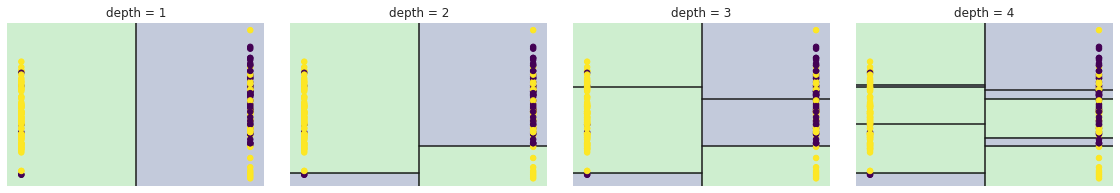

In [10]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

#X, y = make_blobs(n_samples=300, centers=4,
#                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1,5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

    
     


## Random Forest model, depth 4

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


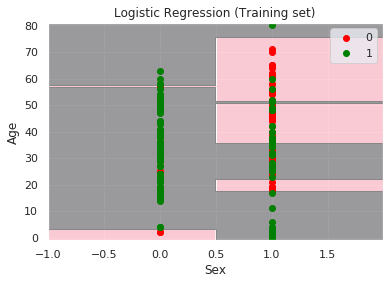

In [11]:
## MODEL    
from sklearn.ensemble import RandomForestClassifier

RF4 = RandomForestClassifier(max_depth=4, random_state=0)
RF4.fit(X, y)

# Predicting the Test set results
y_pred4 = RF4.predict(X)    
    

    
    
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X, y 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, 
             
             RF4.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('pink', 'white', 'grey'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max())

  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('Sex') # for Xlabel 
plt.ylabel('Age') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show()

First of all, women except babies, as well as young boys up to 20 years old and young men from 20 to 30 years old were saved from the Titanic disaster. This is how he classifies the model based on two variables: sex and age.
## Visualization of the Rendom Forest classification using trees 6 deep

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


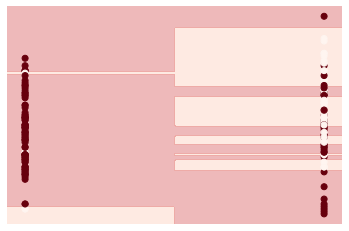

In [12]:
def visualize_classifier(model, X, y, ax=None, cmap='Reds'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    

## MODEL    
from sklearn.ensemble import RandomForestClassifier

RF6 = RandomForestClassifier(max_depth=6, random_state=0)
RF6.fit(X, y)

# Predicting the Test set results
y_pred6 = RF6.predict(X)    
    
    
visualize_classifier(RF6, X, y)

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


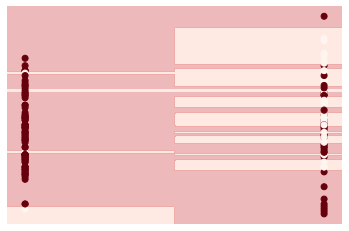

In [13]:
visualize_classifier(DecisionTreeClassifier(), X, y)

## We run a forest of 240 trees, 6 depth each

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


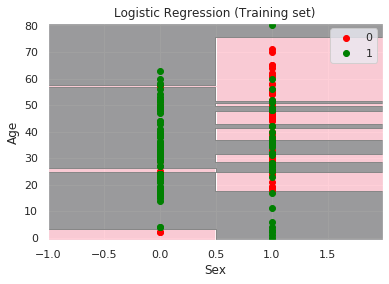

In [14]:
## MODEL    
from sklearn.ensemble import RandomForestClassifier

RF6 = RandomForestClassifier(n_estimators=240, max_depth=6, random_state=0)
RF6.fit(X, y)

# Predicting the Test set results
y_pred6 = RF6.predict(X)    
    





from matplotlib.colors import ListedColormap 
  
X_set, y_set = X, y 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, 
             
             RF6.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('pink', 'white', 'grey'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max())

  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('Sex') # for Xlabel 
plt.ylabel('Age') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show()

## Increasing the number of trees for the variables 'Sex' and 'Age' has no effect over 100 trees.

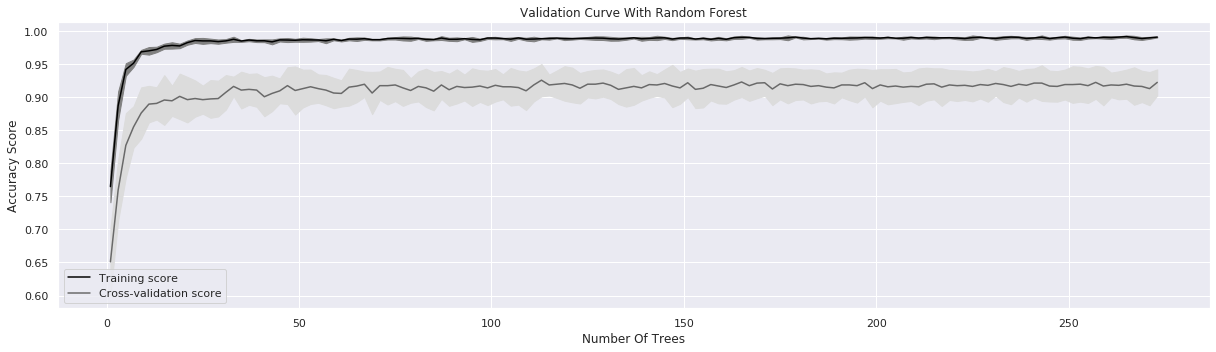

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

## źródło: https://www.dezyre.com/recipes/plot-validation-curve-in-python

## Przerabiam data frame na macierz

import numpy as np
X = np.asarray(X)
Y = np.asarray(y)

digits = load_digits()
# Create feature matrix and target vector
X, y = digits.data, digits.target
# Plot Validation Curve
    
# Create range of values for parameter
param_range = np.arange(1, 275, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(max_depth=6),
                               X, y, param_name="n_estimators", param_range=param_range,
                               cv=4, scoring="accuracy", n_jobs=-1)

  # Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(17,5))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

    # Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

    # Create plot    
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()